# Modules

In [89]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

In [90]:
how = "slope"

# 0 m chirping fiber

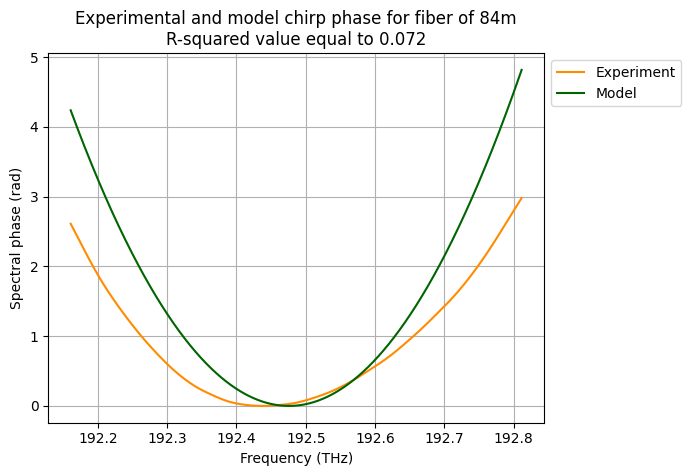

0.07209914841328623

In [91]:
shear = sa.find_shear("data/0m_shear.csv", 
            "data/0m_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_0 = sa.spider("data/0m_pspectrum.csv", 
          "data/0m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_0, 84, True)

# 20 m chirping fiber

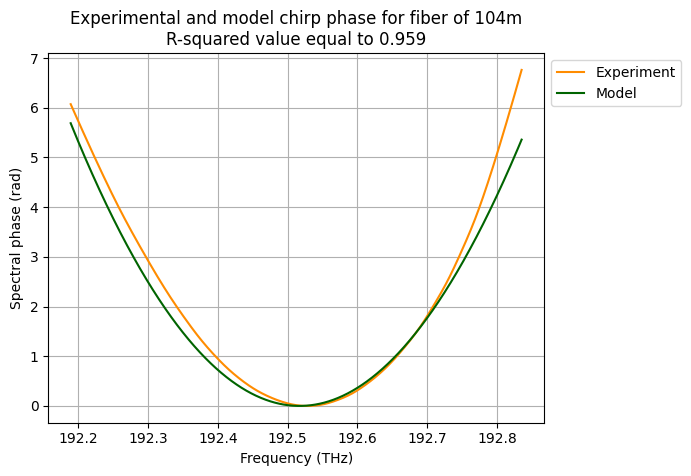

0.9585946083759961

In [92]:
shear = sa.find_shear("data/20m_shear.csv", 
            "data/20m_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_20 = sa.spider("data/20m_pspectrum.csv", 
          "data/20m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_20, 104, True)

# 40 m fiber length

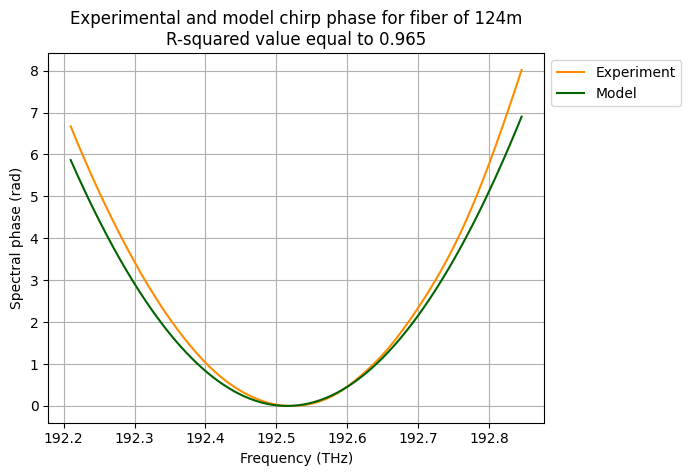

0.9652070143650778

In [93]:
shear = sa.find_shear("data/40m_shear.csv", 
            "data/40m_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40 = sa.spider("data/40m_pspectrum.csv", 
          "data/40m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40, 124, True)

# 60 m fiber length

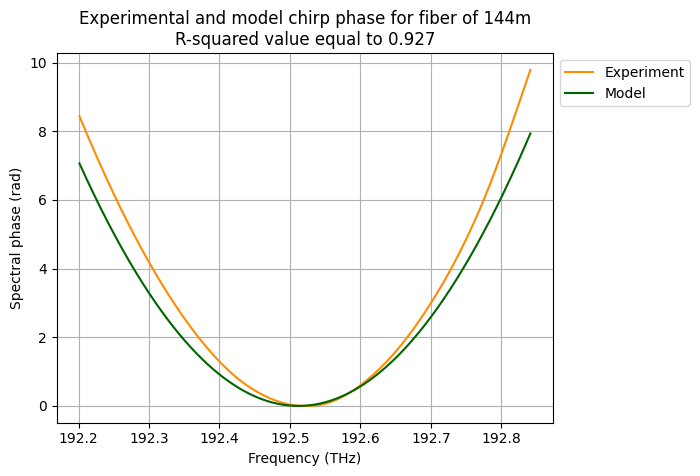

0.9266794445298415

In [94]:
shear = sa.find_shear("data/60m_shear.csv", 
            "data/60m_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_60 = sa.spider("data/60m_pspectrum.csv", 
          "data/60m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_60, 144, True)

# 25 September, 40+80m

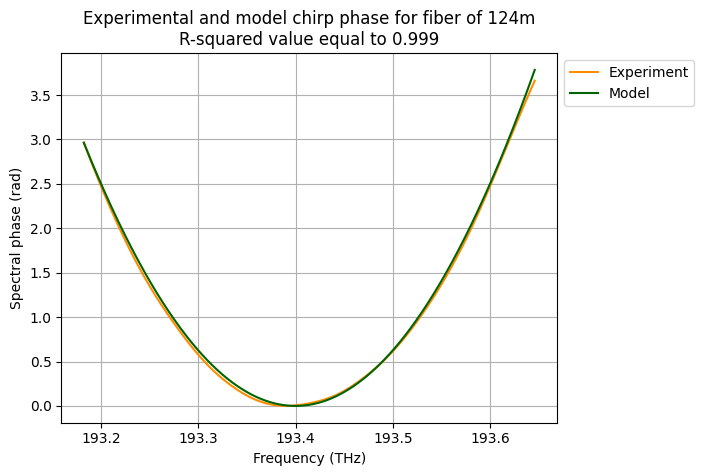

0.9986094721343862

In [95]:
shear = sa.find_shear("data2/80d40c_shear.csv", 
            "data2/80d40c_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_v2 = sa.spider("data2/80d40c_pspectrum.csv", 
          "data2/80d40c_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_v2, 124, True)

# 12 August, 80+20m

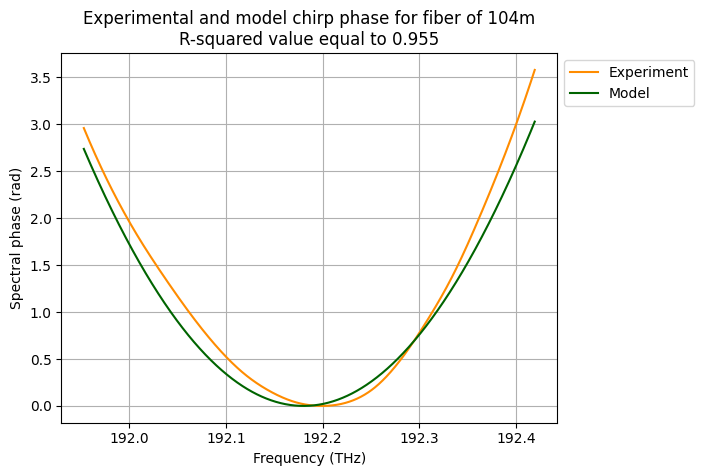

0.9546653272132272

In [96]:
shear = sa.find_shear("data3/80del20chirp_sheared.csv", 
            "data3/80del20chirp_not_sheared.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_20_v3 = sa.spider("data3/80del20chirp_p_spectrum.csv", 
          "data3/80del20chirp_t_spectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_20_v3, 104, True)

# 12 August, 80+40m

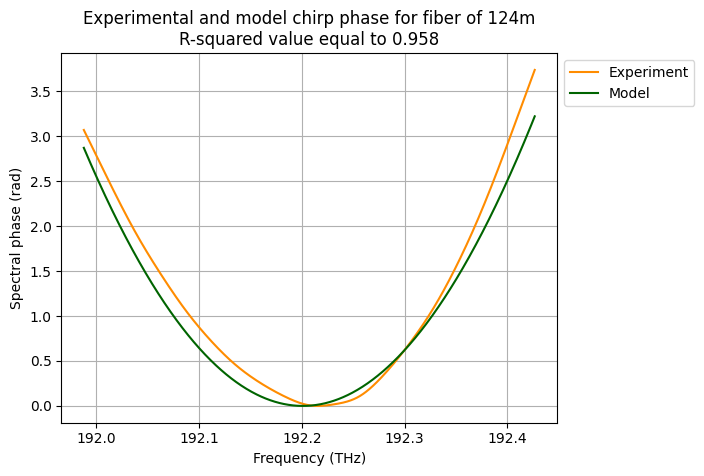

0.957809443087541

In [97]:
shear = sa.find_shear("data3/80del40chirp_sheared.csv", 
            "data3/80del40chirp_not_sheared.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_v3 = sa.spider("data3/80del40chirp_p_spectrum.csv", 
          "data3/80del40chirp_t_spectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_v3, 124, True)

# 40 m delay, 0 m chirp

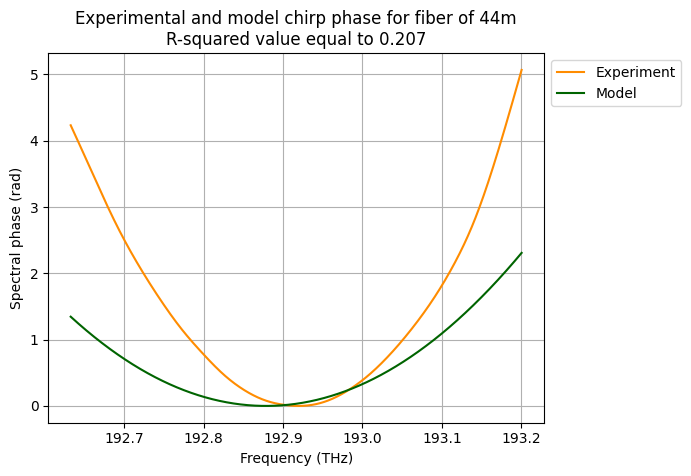

0.20714576597351006

In [98]:
shear = sa.find_shear("data4/40d0c_shear.csv", 
            "data4/40d0c_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_0 = sa.spider("data4/40d0c_tspectrum.csv", 
          "data4/40d0c_pspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_0, 44, True)

# 40 m delay, 20 m chirp

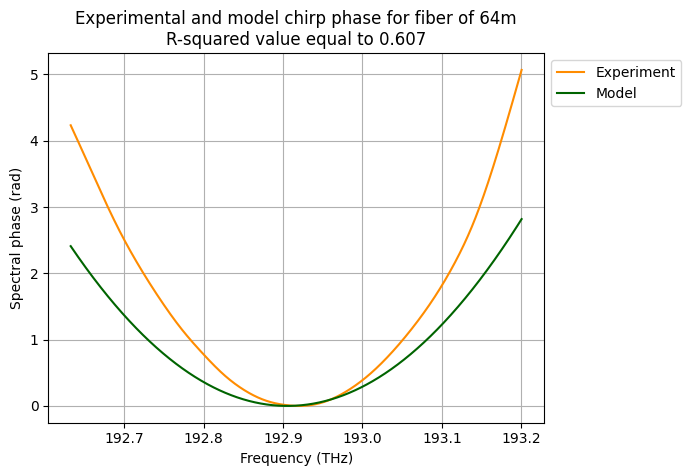

0.6069712531326451

In [99]:
shear = sa.find_shear("data4/40d20c_shear.csv", 
            "data4/40d20c_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_20 = sa.spider("data4/40d20c_tspectrum.csv", 
          "data4/40d20c_pspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_0, 64, True)

# 40 m delay, 80 m chirp

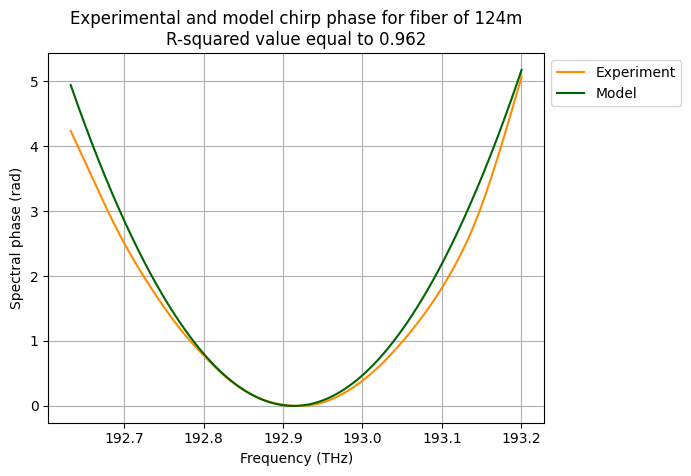

0.9622269222286326

In [100]:
shear = sa.find_shear("data4/40d80c_shear.csv", 
            "data4/40d80c_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_80 = sa.spider("data4/40d80c_tspectrum.csv", 
          "data4/40d80c_pspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_0, 124, True)

# 40 m delay, 100 m chirp

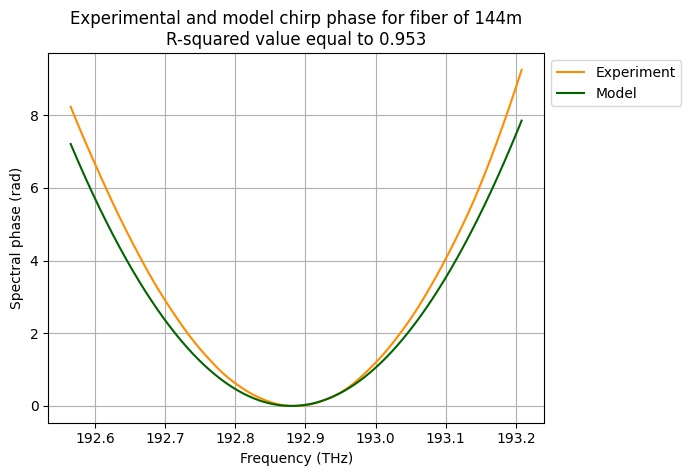

0.9526823139370377

In [101]:
shear = sa.find_shear("data4/40d100c_shear.csv", 
            "data4/40d100c_noshear.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_40_100 = sa.spider("data4/40d100c_tspectrum.csv", 
          "data4/40d100c_pspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_100, 144, True)

# 80 m - three identical probes

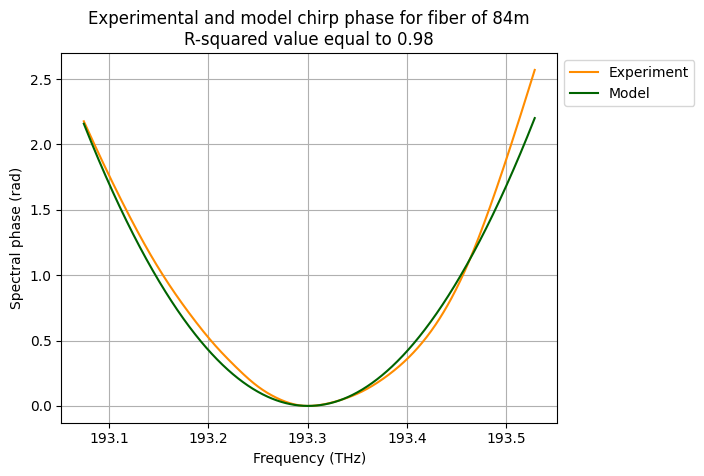

0.9802269170955176

In [102]:
shear = sa.find_shear("data5/80d_shear_i.csv", 
            "data5/80d_noshear_i.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_80_i = sa.spider("data5/80d_tspectrum_i.csv", 
          "data5/80d_pspectrum_i.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_80_i, 84, True)

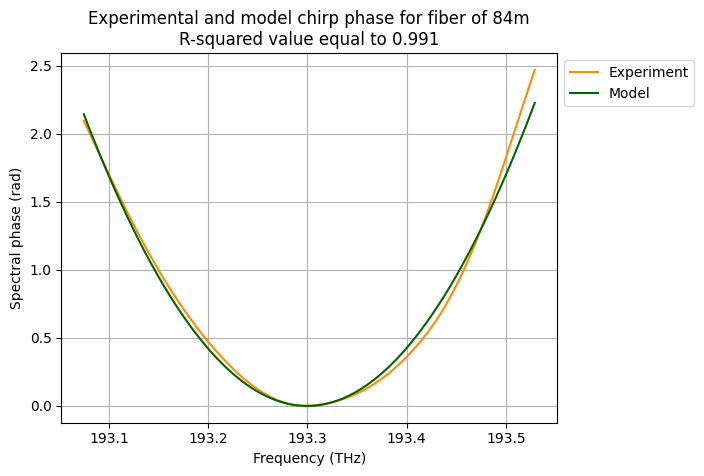

0.9905257305853585

In [103]:
shear = sa.find_shear("data5/80d_shear_ii.csv", 
            "data5/80d_noshear_ii.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_80_ii = sa.spider("data5/80d_tspectrum_ii.csv", 
          "data5/80d_pspectrum_ii.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_80_ii, 84, True)

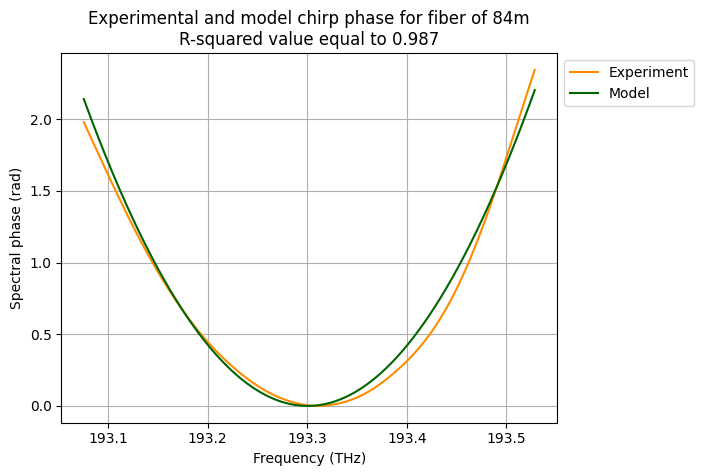

0.9872307789824174

In [104]:
shear = sa.find_shear("data5/80d_shear_iii.csv", 
            "data5/80d_noshear_iii.csv", 
            smoothing_period = None,
            how = how, 
            plot = False)

phase_80_iii = sa.spider("data5/80d_tspectrum_iii.csv", 
          "data5/80d_pspectrum_iii.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_80_iii, 84, True)

# And we compare everything

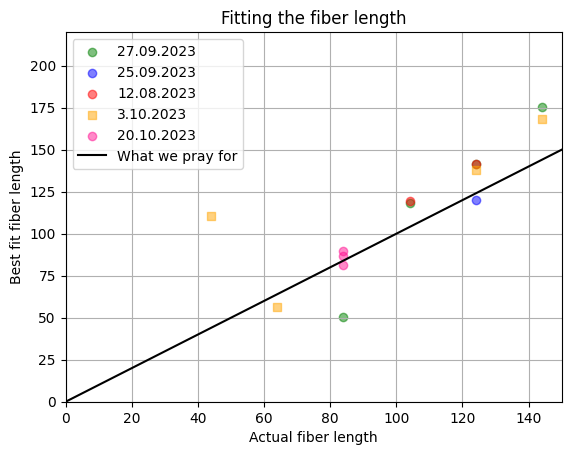

In [105]:
phase_20.Y = np.abs(phase_20.Y)
phase_40.Y = np.abs(phase_40.Y)
phase_60.Y = np.abs(phase_60.Y)
phase_40_v2.Y = np.abs(phase_40_v2.Y)
phase_20_v3.Y = np.abs(phase_20_v3.Y)
phase_40_v3.Y = np.abs(phase_40_v3.Y)
phase_40_0.Y = np.abs(phase_40_0.Y)
phase_80_i.Y = np.abs(phase_80_i.Y)
phase_80_ii.Y = np.abs(phase_80_ii.Y)
phase_80_iii.Y = np.abs(phase_80_iii.Y)


if np.searchsorted(phase_40_v2.X, np.argmin(phase_40_v2.Y)) != np.searchsorted(phase_40.X, np.argmin(phase_40.Y)):
    phase_40_v2.shift(phase_40.X[np.argmin(phase_40.Y)] - phase_40_v2.X[np.argmin(phase_40_v2.Y)])

if np.searchsorted(phase_0.X, np.argmin(phase_40.Y)) != np.searchsorted(phase_40.X, np.argmin(phase_40.Y)):
    phase_0.shift(phase_40.X[np.argmin(phase_40.Y)] - phase_0.X[np.argmin(phase_0.Y)])

fiber_0 = sa.fit_fiber_length(phase_0, False)
fiber_20 = sa.fit_fiber_length(phase_20, False)
fiber_40 = sa.fit_fiber_length(phase_40, False)
fiber_60 = sa.fit_fiber_length(phase_60, False)
fiber_40_v2 = sa.fit_fiber_length(phase_40_v2, False)
fiber_20_v3 = sa.fit_fiber_length(phase_20_v3, False)
fiber_40_v3 = sa.fit_fiber_length(phase_40_v3, False)
fiber_s_0 = sa.fit_fiber_length(phase_40_0, False)
fiber_s_20 = sa.fit_fiber_length(phase_40_20, False)
fiber_s_80 = sa.fit_fiber_length(phase_40_80, False)
fiber_s_100 = sa.fit_fiber_length(phase_40_100, False)
fiber_80_i = sa.fit_fiber_length(phase_80_i, False)
fiber_80_ii = sa.fit_fiber_length(phase_80_ii, False)
fiber_80_iii = sa.fit_fiber_length(phase_80_iii, False)



plt.scatter([84, 104, 124, 144], [fiber_0, fiber_20, fiber_40, fiber_60], color = "green", alpha = 0.5)
plt.scatter([124], [fiber_40_v2], color = "blue", alpha = 0.5)
plt.scatter([104, 124], [fiber_20_v3, fiber_40_v3], color = "red", alpha = 0.5)
plt.scatter([44, 64, 124, 144], [fiber_s_0, fiber_s_20, fiber_s_80, fiber_s_100], color = "orange", marker = "s", alpha = 0.5)
plt.scatter([84, 84, 84], [fiber_80_i, fiber_80_ii, fiber_80_iii], alpha = 0.5, color = "deeppink")
plt.plot(np.linspace(0, 150, 100), np.linspace(0, 150, 100), color = "black")
plt.ylabel("Best fit fiber length")
plt.xlabel("Actual fiber length")
plt.ylim([0, 220])
plt.xlim([0, 150])
plt.grid()
plt.title("Fitting the fiber length")
plt.legend(["27.09.2023", "25.09.2023","12.08.2023", "3.10.2023", "20.10.2023", "What we pray for"])
plt.savefig("Reconstructions effects2.jpg")
plt.show()